<a href="https://colab.research.google.com/github/CodeCrafter-101/Music-Popularity-Prediction/blob/main/Spotify_Music_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Install required libraries
!pip install xgboost lightgbm shap scikit-learn pandas matplotlib seaborn joblib --quiet

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import joblib


In [10]:
# Load Dataset
# Replace with your file path or upload if using Colab
from google.colab import files
uploaded = files.upload()  # Upload CSV file

df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving data.csv to data.csv


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [11]:
# Clean Dataset
# Drop non-numeric columns (like song title, artist name)
df = df.drop(columns=['song_title', 'artist'], errors='ignore')

# Optional: Rename 'target' to 'popularity' for clarity
df.rename(columns={"target": "popularity"}, inplace=True)

# Ensure no missing values
df = df.dropna()

# Confirm columns
print(df.dtypes)



Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
popularity            int64
dtype: object


In [12]:
# Split Features and Target
X = df.drop(columns=["popularity"])
y = df["popularity"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# # SHAP Explainability
# import shap

# # For Random Forest
# explainer = shap.Explainer(rf, X_train)
# shap_values = explainer(X_test)

# shap.plots.beeswarm(shap_values)


# # SHAP for XGBoost and LightGBM like this-->
# explainer = shap.Explainer(xgb_model, X_train)
# shap_values = explainer(X_test)
# shap.plots.beeswarm(shap_values)

In [13]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: 0.999984152201628


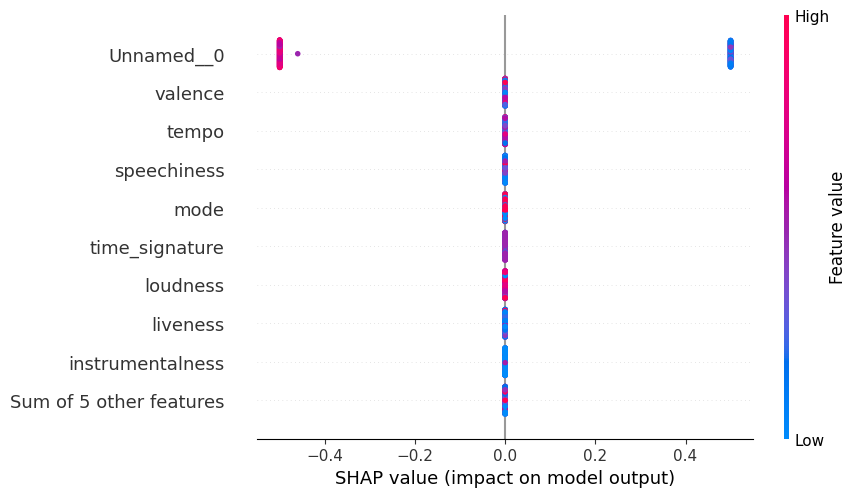

In [20]:
import shap

# Create SHAP explainer for your trained model
explainer = shap.Explainer(rf, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Create SHAP summary (beeswarm) plot
shap.plots.beeswarm(shap_values)


In [14]:
# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost R2:", r2_score(y_test, xgb_pred))

XGBoost R2: 0.9902828931808472


In [16]:
# Clean column names to remove special characters for LightGBM
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [18]:
# Train LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM R2:", r2_score(y_test, lgb_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2822
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 14
[LightGBM] [Info] Start training from score 0.509609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [19]:
# Save Models with Joblib
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgb_model, 'lgb_model.pkl')
print("All models saved as .pkl files")

All models saved as .pkl files


In [ ]:
# # Download Saved Models (if needed)
# from google.colab import files
# files.download('rf_model.pkl')
# files.download('xgb_model.pkl')
# files.download('lgb_model.pkl')